In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

trainingSet = pd.read_csv("./data/X_train.csv")
testingSet = pd.read_csv("./data/X_test.csv")

In [24]:
print(trainingSet.shape)
trainingSet.head()

(1397533, 18)


,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Helpfulness,stemmed_Summary,score_Summary,ReviewLength,SummaryLength,ratio_Summary,Month,Year,Hour,season
0,0,0005019281,ADZPIG9QOCDG5,0,0,4.0,good version of a classic,this is a charming version of the classic dick...,0.0,good version of a classic,1.939881,54,5,0.387976,2,2008,0,1
1,1,0005019281,A35947ZP82G7JH,0,0,3.0,good but not as moving,it was good but not as emotionally moving as t...,0.0,good but not as move,1.983612,23,5,0.396722,12,2013,0,1
2,2,0005019281,A3UORV8A9D5L2E,0,0,3.0,winkler's performance was ok at best!,"don't get me wrong, winkler is a wonderful cha...",0.0,winkler s perform was ok at best,1.984487,47,6,0.330748,12,2013,0,1
3,3,0005019281,A1VKW06X1O2X7V,0,0,5.0,it's an enjoyable twist on the classic story,henry winkler is very good in this twist on th...,0.0,it s an enjoy twist on the classic stori,2.592614,30,8,0.324077,2,2008,0,1
4,4,0005019281,A3R27T4HADWFFJ,0,0,4.0,best scrooge yet,this is one of the best scrooge movies out. h...,0.0,best scroog yet,1.000000,26,3,0.333333,12,2013,0,1


In [25]:
print(testingSet.shape)
testingSet.head()

(300000, 18)


,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Summary,Text,Helpfulness,stemmed_Summary,score_Summary,ReviewLength,SummaryLength,ratio_Summary,Month,Year,Hour,season,Score
0,5,0005019281,A2L0G56BNOTX6S,0,0,dickens updated.,this has been a favorite movie of mine for a l...,0.000000,dicken updat,0.000000,46,2,0.000000,11,2013,0,4,NaN
1,11,0005019281,A33EWPXESP9GQH,0,0,good version,even though i don't care for henry winklers a...,0.000000,good version,1.372547,19,2,0.686273,1,2014,0,1,NaN
2,17,0005019281,A13KAQO9F5X0FN,0,0,the fonz does scrooge,anorher good movie for holiday watchers..a lit...,0.000000,the fonz doe scroog,1.316609,21,4,0.329152,1,2014,0,1,NaN
3,46,0005019281,A306NASGVUDFKF,10,14,a refreshing twist on a holiday classic,my wife and i grew up in new hampshire where t...,0.714286,a refresh twist on a holiday classic,1.414210,61,7,0.202030,11,2005,0,4,NaN
4,47,0005019281,A38G1NN5SD81GD,0,1,not my favorite,"this is a first for me, i didn't like this mov...",0.000000,not my favorit,1.716560,27,3,0.572187,11,2013,0,4,NaN


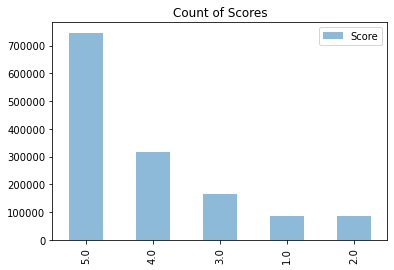

In [26]:
trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)x
plt.title("Count of Scores")
plt.show()

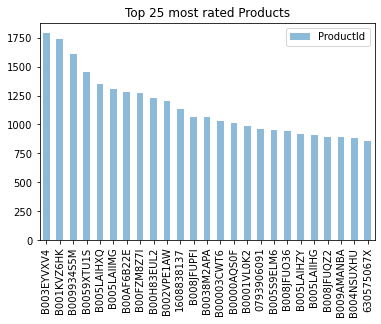

In [27]:
trainingSet['ProductId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 most rated Products")
plt.show()

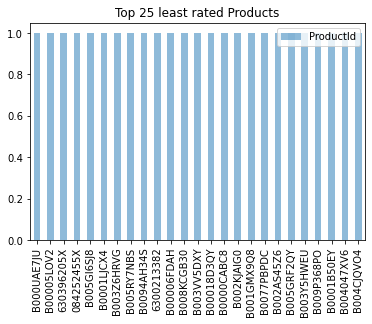

In [28]:
trainingSet['ProductId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 least rated Products")
plt.show()

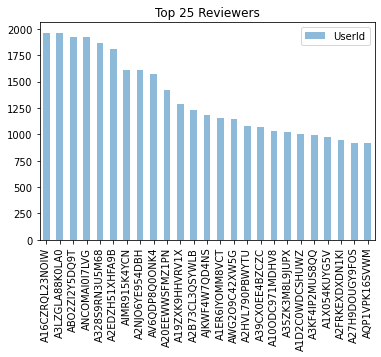

In [29]:
trainingSet['UserId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 Reviewers")
plt.show()

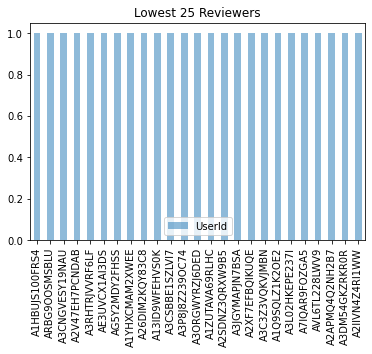

In [30]:
trainingSet['UserId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Lowest 25 Reviewers")
plt.show()

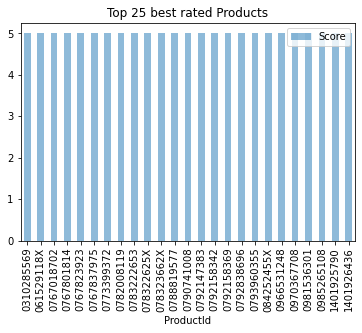

In [38]:
trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 best rated Products")
plt.show()

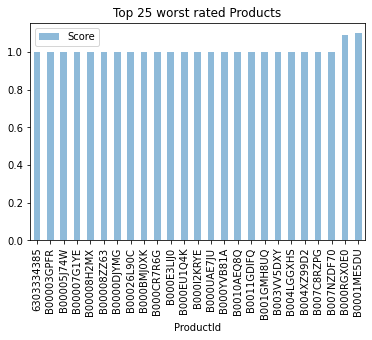

In [39]:
trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 worst rated Products")
plt.show()

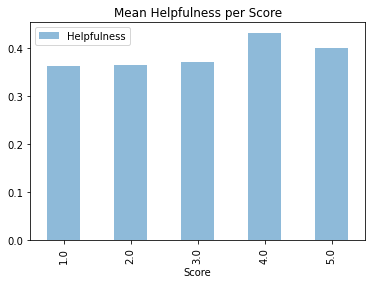

In [217]:
trainingSet[['Score', 'Helpfulness']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Helpfulness per Score")
plt.show()

In [91]:
trainingSet['Summary'] = trainingSet['Summary'].fillna('')
trainingSet['Text'] = trainingSet['Text'].fillna('')

trainingSet['Summary'] = trainingSet['Summary'].str.lower()
trainingSet['Text'] = trainingSet['Text'].str.lower()

In [27]:
import nltk
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

nltk.download('stopwords')
Lemma = WordNetLemmatizer()
nltk.download('punkt')
nltk.download('stopwords')
snow_stemmer = SnowballStemmer(language='english')

def stem(text):
    return ' '.join([SnowballStemmer("english").stem(word) for word in word_tokenize(text)])

trainingSet['stemmed_Summary'] = trainingSet['Summary'].apply(stem)
trainingSet['stemmed_Summary'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in trainingSet['stemmed_Summary']]

vectorizer = TfidfVectorizer(max_df=0.999, min_df=0.005).fit(trainingSet['stemmed_Summary'])
new_df = vectorizer.transform(trainingSet['stemmed_Summary'])

new_df = pd.DataFrame(new_df.toarray(), columns= vectorizer.get_feature_names())
trainingSet['score_Summary'] = new_df.sum(axis = 1)

[nltk_data] Downloading package stopwords to /Users/mini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
new_df['Score'] = trainingSet['Score']
#print(trainingSet['score_Summary'])

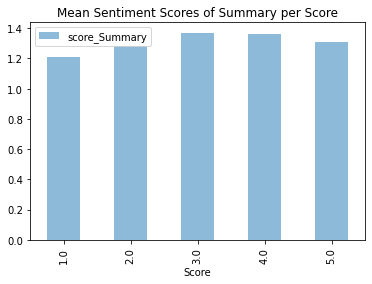

In [29]:
trainingSet[['Score', 'score_Summary']].groupby('Score').mean().plot(kind = 'bar', legend = True, alpha = .5)
plt.title("Mean Sentiment Scores of Summary per Score")
plt.show()

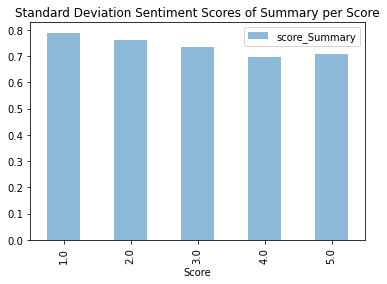

In [30]:
trainingSet[['Score', 'score_Summary']].groupby('Score').std().plot(kind = 'bar', legend = True, alpha = .5)
plt.title("Standard Deviation Sentiment Scores of Summary per Score")
plt.show()

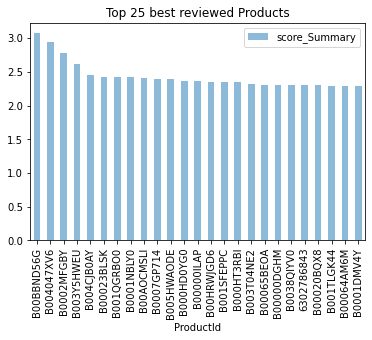

In [31]:
trainingSet[['score_Summary', 'ProductId']].groupby('ProductId').mean().nlargest(25, 'score_Summary').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 best reviewed Products")
plt.show()

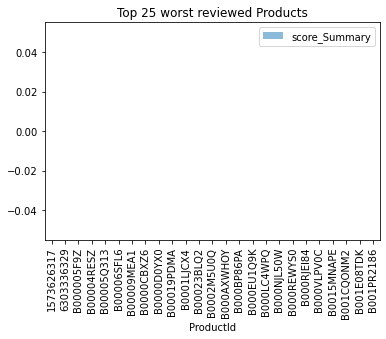

In [32]:
trainingSet[['score_Summary', 'ProductId']].groupby('ProductId').mean().nsmallest(25, 'score_Summary').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 worst reviewed Products")
plt.show()


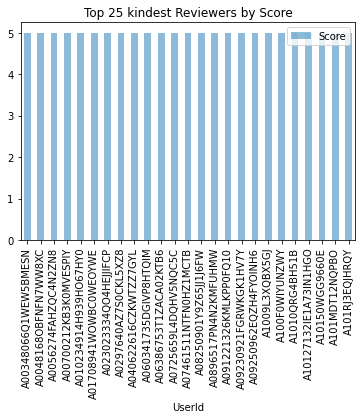

In [33]:
trainingSet[['Score', 'UserId']].groupby('UserId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 kindest Reviewers by Score")
plt.show()

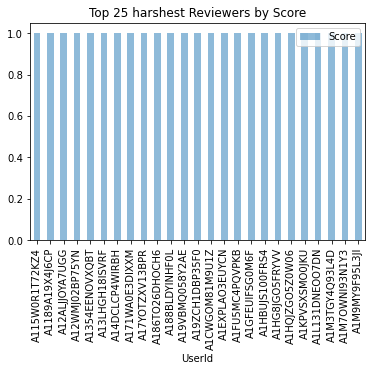

In [157]:
trainingSet[['Score', 'UserId']].groupby('UserId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 harshest Reviewers by Score")
plt.show()

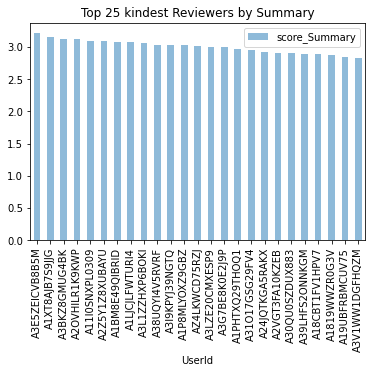

In [158]:
trainingSet[['score_Summary', 'UserId']].groupby('UserId').mean().nlargest(25, 'score_Summary').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 kindest Reviewers by Summary")
plt.show()

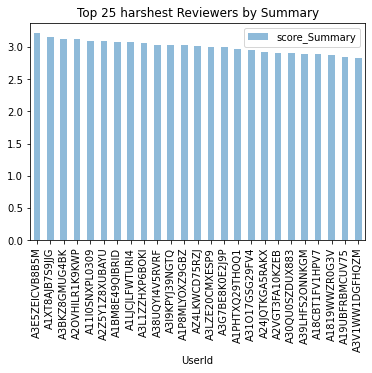

In [159]:
trainingSet[['score_Summary', 'UserId']].groupby('UserId').mean().nlargest(25, 'score_Summary').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 harshest Reviewers by Summary")
plt.show()

In [34]:
trainingSet['ReviewLength'] = trainingSet.apply(lambda row : len(row['Text'].split()) if type(row['Text']) == str else 0, axis = 1)
trainingSet['SummaryLength'] = trainingSet.apply(lambda row : len(row['Summary'].split()) if type(row['Summary']) == str else 0, axis = 1)


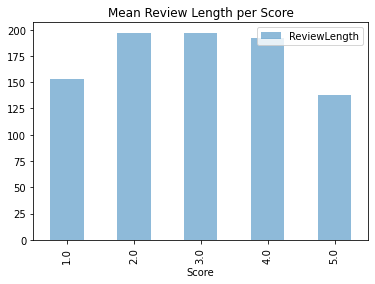

In [161]:
trainingSet[['Score', 'ReviewLength']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Review Length per Score")
plt.show()

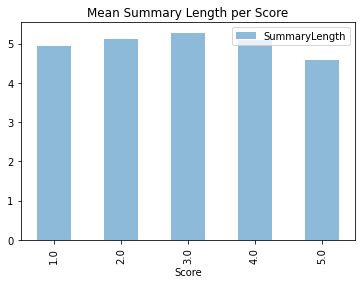

In [162]:
trainingSet[['Score', 'SummaryLength']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Summary Length per Score")
plt.show()

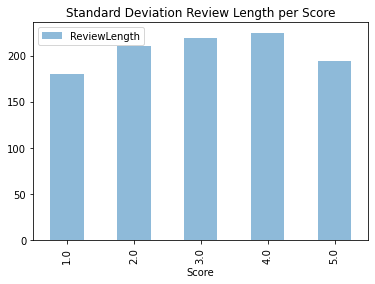

In [81]:
trainingSet[['Score', 'ReviewLength']].groupby('Score').std().plot(kind='bar', legend=True, alpha=.5)
plt.title("Standard Deviation Review Length per Score")
plt.show()

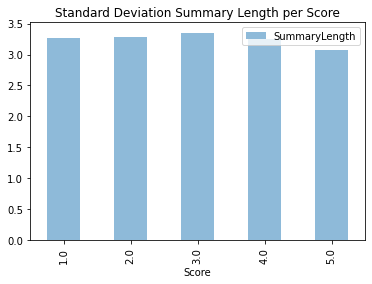

In [163]:
trainingSet[['Score', 'SummaryLength']].groupby('Score').std().plot(kind='bar', legend=True, alpha=.5)
plt.title("Standard Deviation Summary Length per Score")
plt.show()

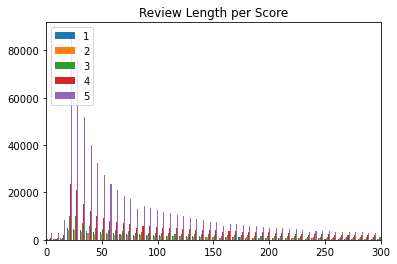

In [175]:
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'darkorange', 'indigo', 'pink', 'grey']
fig, ax = plt.subplots()
reviews = []
for i in range(1, 6):
    score = trainingSet.where(trainingSet['Score'] == float(i))
    reviews.append(score['ReviewLength'].dropna())

plt.hist(reviews, bins=1000, label=list(range(1, 6)))
ax.legend(loc='upper left')
plt.xlim(0, 300)
plt.title("Review Length per Score")
plt.show()  

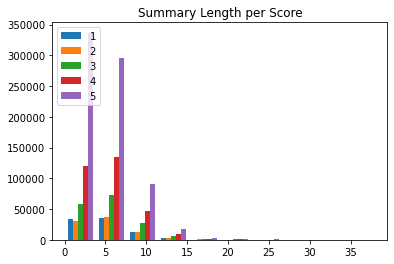

In [176]:
fig, ax = plt.subplots()
reviews = []
for i in range(1, 6):
    score = trainingSet.where(trainingSet['Score'] == float(i))
    reviews.append(score['SummaryLength'].dropna())

plt.hist(reviews, bins=10, label=list(range(1, 6)))
ax.legend(loc='upper left')
plt.title("Summary Length per Score")
plt.show()

Top 100 words for Score =  1
['movi', 'worst', 'film', 'bore', 'wast', 'time', 'star', 'terribl', 'horribl', 'aw', 'dvd', 'disappoint', 'watch', 'veri', 'money', 'realli', 'great', 'poor', 'stupid', 'whi', 'review', 'buy', 'make', 'onli', 'made', 'anoth', 'garbag', 'suck', 'show', 'hate', 'doe', 'version', 'worth', 'love', 'funni', 'ray', 'give', 'stori', 'crap', 'pleas', 'horror', 'qualiti', 'blu', 'act', 'total', 'seri', 'rate', 'noth', 'lame', 'zero', 'absolut', 'big', 'complet', 'wors', 'quot', 'releas', 'kid', 'save', 'origin', 'season', 'dumb', 'trash', 'back', 'peopl', 'plot', 'book', 'real', 'year', 'bewar', 'hollywood', 'edit', 'sad', 'mess', 'bother', 'comedi', 'wrong', 'rip', 'wow', 'avoid', 'hour', 'video', 'dull', 'play', 'pain', 'miss', 'life', 'warn', 'disc', 'slow', 'remak', 'away', 'transfer', 'set', 'pointless', 'classic', 'god', 'product', 'stop', 'low', 'sequel']

Top 100 words for Score =  2
['movi', 'disappoint', 'film', 'great', 'bore', 'veri', 'star', 'stori', '

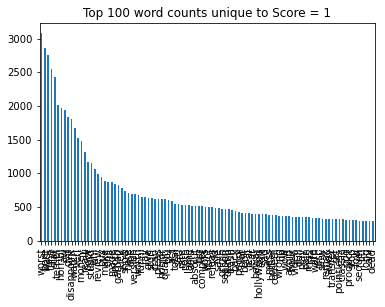

Top 100 words sort of unique to Score =  2
['disappoint', 'bore', 'veri', 'star', 'stori', 'poor', 'time', 'watch', 'dvd', 'realli', 'onli', 'wast', 'review', 'funni', 'anoth', 'expect', 'act', 'doe', 'plot', 'worst', 'whi', 'worth', 'noth', 'make', 'littl', 'interest', 'slow', 'show', 'miss', 'quot', 'terribl', 'origin', 'seri', 'pretti', 'book', 'comedi', 'qualiti', 'horror', 'big', 'money', 'weak', 'ray', 'version', 'action', 'blu', 'dull', 'stupid', 'long', 'mediocr', 'save', 'predict', 'hard', 'season', 'horribl', 'entertain', 'made', 'sequel', 'lame', 'kid', 'overr', 'aw', 'lack', 'buy', 'cast', 'silli', 'fun', 'classic', 'special', 'script', 'flick', 'idea', 'lot', 'pleas', 'remak', 'actor', 'potenti', 'real', 'dumb', 'sad', 'averag', 'effect', 'charact', 'someth', 'video', 'peopl', 'b', 'work', 'fail', 'mess', 'music', 'part', 'product', 'meh', 'happen', 'nice', 'start', 'lost', 'tv', 'half', 'set']



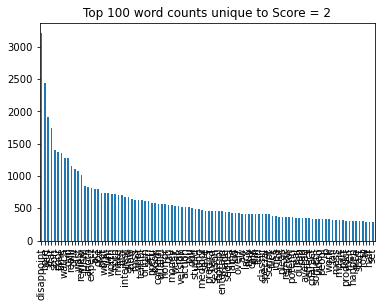

Top 100 words sort of unique to Score =  3
['star', 'fun', 'stori', 'entertain', 'dvd', 'watch', 'veri', 'interest', 'disappoint', 'funni', 'littl', 'review', 'expect', 'time', 'decent', 'worth', 'action', 'pretti', 'comedi', 'realli', 'show', 'season', 'enjoy', 'onli', 'classic', 'seri', 'averag', 'act', 'flick', 'horror', 'origin', 'nice', 'ray', 'quot', 'doe', 'blu', 'make', 'bit', 'noth', 'plot', 'anoth', 'book', 'miss', 'slow', 'cute', 'poor', 'version', 'qualiti', 'kid', 'lot', 'b', 'special', 'quit', 'thriller', 'long', 'perform', 'bore', 'flaw', 'mediocr', 'music', 'hard', 'predict', 'set', 'whi', 'day', 'mix', 'differ', 'cast', 'lack', 'sequel', 'part', 'half', 'back', 'drama', 'big', 'work', 'start', 'video', 'beauti', 'famili', 'made', 'dark', 'effect', 'short', 'someth', 'life', 'live', 'charact', 'silli', 'sci', 'edit', 'anim', 'real', 'moment', 'tv', 'feel', 'fair', 'kind', 'buy', 'weak']



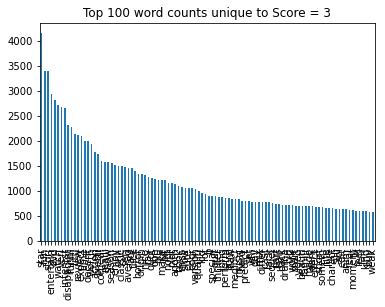

Top 100 words sort of unique to Score =  4
['fun', 'veri', 'stori', 'entertain', 'funni', 'dvd', 'star', 'enjoy', 'watch', 'show', 'action', 'time', 'seri', 'season', 'excel', 'interest', 'review', 'comedi', 'worth', 'surpris', 'pretti', 'nice', 'horror', 'flick', 'littl', 'famili', 'realli', 'anoth', 'thriller', 'ray', 'blu', 'expect', 'quot', 'act', 'make', 'drama', 'origin', 'cute', 'life', 'beauti', 'wonder', 'back', 'perform', 'set', 'differ', 'kid', 'version', 'book', 'solid', 'dark', 'music', 'lot', 'doe', 'collect', 'sci', 'year', 'day', 'onli', 'real', 'anim', 'decent', 'western', 'final', 'sequel', 'perfect', 'live', 'work', 'high', 'workout', 'quit', 'tv', 'bit', 'favorit', 'made', 'cast', 'world', 'big', 'cool', 'qualiti', 'heart', 'twist', 'awesom', 'b', 'histori', 'adventur', 'miss', 'plot', 'fine', 'whi', 'charact', 'effect', 'power', 'long', 'sweet', 'flaw', 'suspens', 'start', 'mysteri', 'peopl', 'releas']



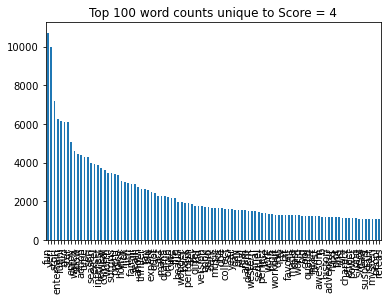

Top 100 words sort of unique to Score =  5
['movi', 'great', 'love', 'film', 'classic', 'dvd', 'seri', 'show', 'excel', 'season', 'time', 'star', 'awesom', 'wonder', 'favorit', 'watch', 'amaz', 'comedi', 'famili', 'anoth', 'ray', 'beauti', 'review', 'blu', 'collect', 'tv', 'action', 'fantast', 'enjoy', 'set', 'realli', 'year', 'final', 'perfect', 'masterpiec', 'life', 'horror', 'made', 'quot', 'brilliant', 'christma', 'worth', 'make', 'anim', 'wow', 'music', 'hilari', 'greatest', 'back', 'drama', 'origin', 'real', 'version', 'kid', 'buy', 'act', 'surpris', 'day', 'live', 'complet', 'perform', 'outstand', 'flick', 'rock', 'doe', 'western', 'high', 'absolut', 'power', 'nice', 'littl', 'video', 'top', 'world', 'onli', 'workout', 'heart', 'sci', 'thriller', 'laugh', 'superb', 'histori', 'dark', 'gift', 'book', 'releas', 'disney', 'edit', 'work', 'big', 'alway', 'interest', 'whi', 'miss', 'everi', 'long', 'move', 'cute', 'adventur', 'wait']



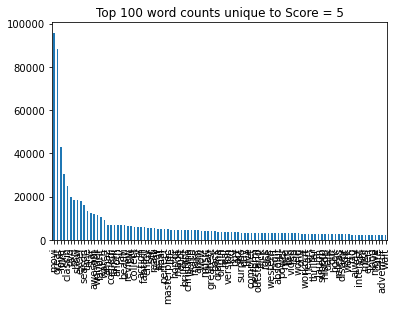

In [179]:
topWords = []
for i in range(1,6):
    words = pd.Series(word_tokenize(' '.join(trainingSet.where(trainingSet['Score'] == float(i))['stemmed_Summary'].dropna()).lower())).value_counts()
    topWordsForScore = words.where(~words.index.isin(stopwords.words()))
    print("Top 100 words for Score = ", i)
    print(topWordsForScore.nlargest(100).index.tolist())
    print()
    topWords.append(topWordsForScore)

for i in range(len(topWords)):
    fig, ax = plt.subplots()
    allExcepti = topWords[:i] + topWords[i+1:]
    flattened = pd.concat(allExcepti)
    topWords[i] = topWords[i].where(~topWords[i].index.isin(flattened.nlargest( ).index.tolist()))
    print("Top 100 words sort of unique to Score = ", i+1)
    print(topWords[i].nlargest(100).index.tolist())
    print()
    topWords[i].nlargest(100).plot(kind='bar', ax=ax)
    plt.title("Top 100 word counts unique to Score = " + str(i+1))
    plt.show()

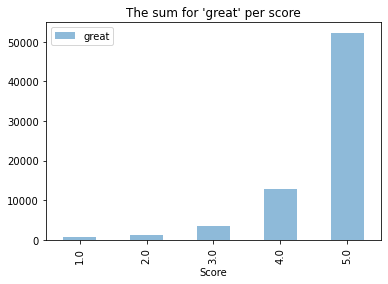

In [35]:
new_df[['Score', 'great']].groupby('Score').sum().plot(kind='bar', legend=True, alpha=.5)
plt.title("The sum for 'great' per score")
plt.show()

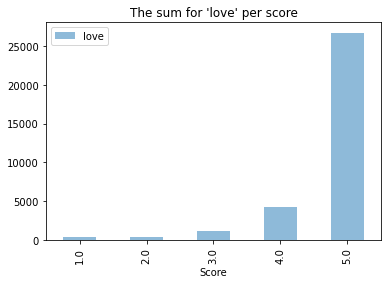

In [187]:
new_df[['Score', 'love']].groupby('Score').sum().plot(kind='bar', legend=True, alpha=.5)
plt.title("The sum for 'love' per score")
plt.show()

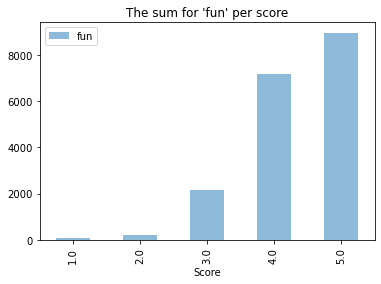

In [189]:
new_df[['Score', 'fun']].groupby('Score').sum().plot(kind='bar', legend=True, alpha=.5)
plt.title("The sum for 'fun' per score")
plt.show()

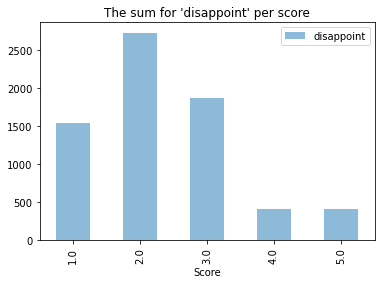

In [266]:
new_df[['Score', 'disappoint']].groupby('Score').sum().plot(kind='bar', legend=True, alpha=.5)
plt.title("The sum for 'disappoint' per score")
plt.show()

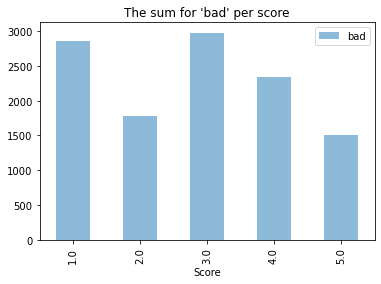

In [199]:
new_df[['Score', 'bad']].groupby('Score').sum().plot(kind='bar', legend=True, alpha=.5)
plt.title("The sum for 'bad' per score")
plt.show()

In [36]:
trainingSet['Date'] = pd.to_datetime(trainingSet['Time'], unit='s')
trainingSet['Month'] = trainingSet['Date'].dt.month
trainingSet['Year'] = trainingSet['Date'].dt.year
trainingSet['Hour'] = trainingSet['Date'].dt.hour

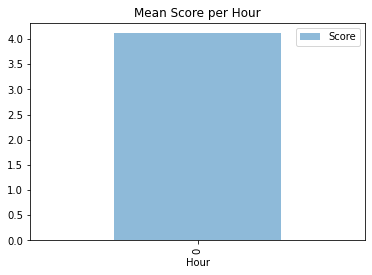

In [227]:
trainingSet[['Score', 'Hour']].groupby('Hour').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Score per Hour")
plt.show()

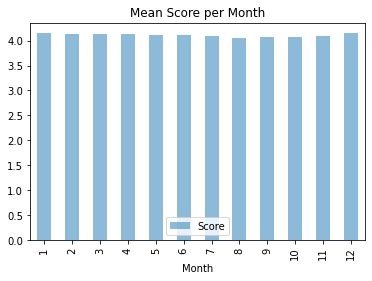

In [37]:
trainingSet[['Score', 'Month']].groupby('Month').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Score per Month")
plt.show()

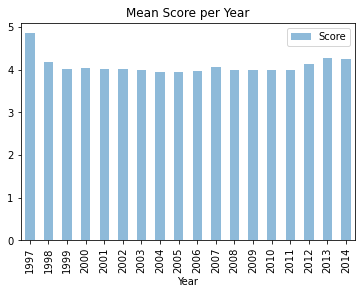

In [38]:
trainingSet[['Score', 'Year']].groupby('Year').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Score per Year")
plt.show()

In [230]:
trainingSet['season'] = trainingSet['Month'] % 12 // 3 + 1

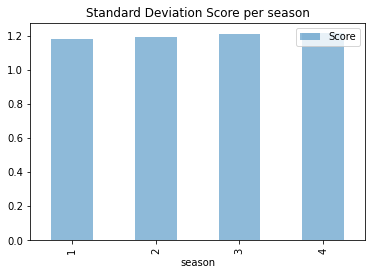

In [230]:
trainingSet[['Score', 'season']].groupby('season').std().plot(kind='bar', legend=True, alpha=.5)
plt.title("Standard Deviation Score per season")
plt.show()

In [98]:
temp_df

,ratio_Summary
Score,
1.0,0.249166
2.0,0.266759
3.0,0.289208
4.0,0.308392
5.0,0.332493


In [96]:
temp_df = trainingSet[['Score', 'ratio_Summary']].groupby('Score').mean()
for index, row in trainingSet[trainingSet['ratio_Summary'].isna()].iterrows():
    trainingSet['ratio_Summary'][index] = temp_df.iloc[int(row['Score']) - 1]

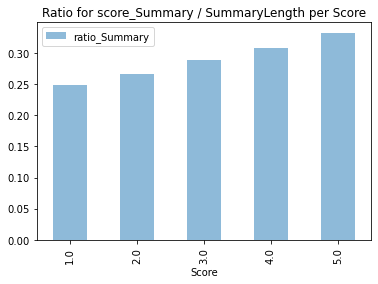

In [97]:
trainingSet['ratio_Summary'] = trainingSet['score_Summary'] / trainingSet['SummaryLength']

trainingSet[['Score', 'ratio_Summary']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Ratio for score_Summary / SummaryLength per Score")
plt.show()

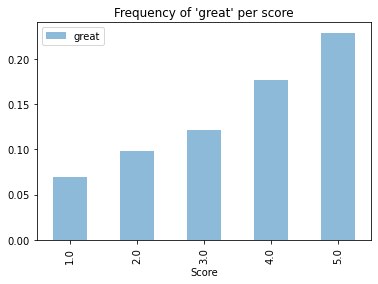

In [9]:
trainingSet[['Score', 'great']].groupby('Score').std().plot(kind='bar', legend=True, alpha=.5)
plt.title("Frequency of 'great' per score")
plt.show()

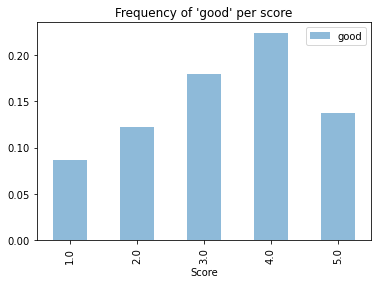

In [11]:
trainingSet[['Score', 'good']].groupby('Score').std().plot(kind='bar', legend=True, alpha=.5)
plt.title("Frequency of 'good' per score")
plt.show()

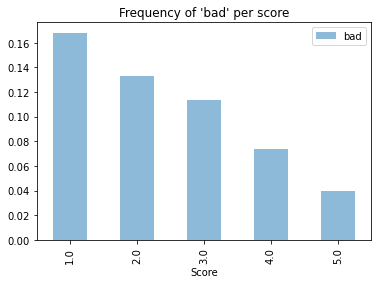

In [13]:
trainingSet[['Score', 'bad']].groupby('Score').std().plot(kind='bar', legend=True, alpha=.5)
plt.title("Frequency of 'bad' per score")
plt.show()